<a href="https://colab.research.google.com/github/Varstzeiin/Project-2-Rekomendasi-Kopi/blob/main/MODEL_RECOMENDATION_ASTORIA_LOC_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODEL FOR PROJECT**

## **ASTORIA LOCATION**

### Install MLxtend library

In [ ]:
pip install -u mlxtend


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


### Import Library

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

### Import Library

In [ ]:
df_ast = pd.read_excel('/content/dataset_astoria_updated.xlsx') # Try reading again after unzip
df_ast = df_ast.drop(columns=["invoice_id","product_id", "store_id", "unit_price", "Month", "Month.1", "Revenue", "Weekday.1", "Weekday", "Hour"])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ast['product_detail'] = df_ast['product_detail'].str.strip()
df_ast.dropna(axis = 0, subset = ['new_invoice_id'], inplace = True)
df_ast['new_invoice_id'] = df_ast['new_invoice_id'].astype('str')
df_ast = df_ast[~df_ast['new_invoice_id'].str.contains('C')]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ast

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_datetime,transaction_qty,store_location,product_category,product_type,product_detail,new_invoice_id
0,2023-01-01 11:01:48,1,Astoria,Coffee,Drip coffee,Our Old Time Diner Blend Sm,INV00001
1,2023-01-01 11:01:58,1,Astoria,Coffee,Barista Espresso,Latte,INV00001
2,2023-01-01 11:28:29,2,Astoria,Coffee,Gourmet brewed coffee,Ethiopia Lg,INV00003
3,2023-01-01 11:43:57,2,Astoria,Coffee,Organic brewed coffee,Brazilian Sm,INV00004
4,2023-01-01 11:47:13,1,Astoria,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,INV00004
...,...,...,...,...,...,...,...
20020,2023-06-30 19:35:24,2,Astoria,Coffee,Barista Espresso,Cappuccino Lg,INV20021
20021,2023-06-30 19:45:16,1,Astoria,Coffee,Barista Espresso,Cappuccino Lg,INV20021
20022,2023-06-30 19:51:59,2,Astoria,Coffee,Organic brewed coffee,Brazilian Rg,INV20023
20023,2023-06-30 19:52:28,2,Astoria,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,INV20023


### Model

In [ ]:
basket = (df_ast
          .groupby(['new_invoice_id', 'product_detail'])['transaction_qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('new_invoice_id'))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,Ethiopia Rg,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm
new_invoice_id,,,,,,,,,,,,,,,,,,,,
INV00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
INV00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00004,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-fca9b50fcc17>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [ ]:
basket_sets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,Ethiopia Rg,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm
new_invoice_id,,,,,,,,,,,,,,,,,,,,
INV00001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
INV00003,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
INV00004,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
INV00008,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
INV00010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INV20015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
INV20016,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
INV20017,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Convert basket to boolean format
basket_sets.astype(bool)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,Ethiopia Rg,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm
new_invoice_id,,,,,,,,,,,,,,,,,,,,
INV00001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
INV00003,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
INV00004,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
INV00008,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
INV00010,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INV20015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
INV20016,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
INV20017,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Apply apriori with minimum support
frequent_itemsets = apriori(basket_sets, min_support=0.015, use_colnames=True)
print(f"Frequent Itemsets Found: {len(frequent_itemsets)}")
# Menampilkan rata-rata nilai support
average_support = frequent_itemsets['support'].mean()
print(f"Average Support: {average_support}")
# Mengurutkan frequent itemsets berdasarkan support secara ascending
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

Frequent Itemsets Found: 140
Average Support: 0.03290916855939278


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.138198,(Columbian Medium Roast Rg)
19,0.137383,(Our Old Time Diner Blend Sm)
12,0.137111,(Jamaican Coffee River Lg)
11,0.136432,(Ethiopia Sm)
1,0.134121,(Brazilian Rg)
...,...,...
105,0.015084,"(Ethiopia Rg, Jamaican Coffee River Sm)"
96,0.015084,"(Espresso shot, Our Old Time Diner Blend Lg)"
136,0.015084,"(Our Old Time Diner Blend Sm, Latte Rg)"
137,0.015084,"(Our Old Time Diner Blend Rg, Our Old Time Din..."


In [ ]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules= association_rules(frequent_itemsets, metric='lift', min_threshold=0.7, support_only=False)

# Print or display the rules
if rules.empty:
    print("aturan asosiasi ga ditemukan. Coba kau kurangi kurangi sikit itu nilai min_support atau min_threshold nya.")
else:
    print(rules.head())

      antecedents                  consequents  antecedent support  \
0  (Brazilian Lg)               (Brazilian Rg)            0.121348   
1  (Brazilian Rg)               (Brazilian Lg)            0.134121   
2    (Cappuccino)               (Brazilian Lg)            0.118766   
3  (Brazilian Lg)                 (Cappuccino)            0.121348   
4  (Brazilian Lg)  (Columbian Medium Roast Lg)            0.121348   

   consequent support   support  confidence      lift  representativity  \
0            0.134121  0.016171    0.133259  0.993567               1.0   
1            0.121348  0.016171    0.120567  0.993567               1.0   
2            0.121348  0.015219    0.128146  1.056024               1.0   
3            0.118766  0.015219    0.125420  1.056024               1.0   
4            0.126104  0.017665    0.145577  1.154417               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0 -0.000105    0.999005      -0.007315  0.067575  -0.0

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sorting rules by lift to identify the best associations
rules = rules.sort_values(by='lift', ascending=False)
rules_sorted = rules.sort_values(by='lift', ascending=False)
average_rules = rules['lift'].mean()
print(f"Average Lift of Astoria: {average_rules}")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Average Lift of Astoria: 1.025150424368121


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
67,(Brazilian Sm),(Our Old Time Diner Blend Sm),0.021742,0.176018,1.281220
66,(Our Old Time Diner Blend Sm),(Brazilian Sm),0.021742,0.158259,1.281220
178,(Our Old Time Diner Blend Sm),(Ethiopia Rg),0.020655,0.150346,1.221189
179,(Ethiopia Rg),(Our Old Time Diner Blend Sm),0.020655,0.167770,1.221189
184,(Ethiopia Sm),(Jamaican Coffee River Sm),0.019704,0.144422,1.220211
...,...,...,...,...,...
233,(Latte Rg),(Our Old Time Diner Blend Sm),0.015084,0.121444,0.883984
201,(Jamaican Coffee River Lg),(Latte),0.016035,0.116947,0.876391
200,(Latte),(Jamaican Coffee River Lg),0.016035,0.120163,0.876391
36,(Ethiopia Sm),(Brazilian Rg),0.015627,0.114542,0.854016


# **IMPLEMENTASI**

In [ ]:
# Real-time input function for recommendations
def recommend_products_interactive(rules, top_n=3):
    while True:
        print("\n--- Coffee Product Recommendation System ---")
        selected_products = input("Enter purchased product(s) separated by commas (or type 'exit' to quit): ").strip()
        if selected_products.lower() == 'exit':
            print("Exiting the system. Have a great day!")
            break
        selected_products = [product.strip() for product in selected_products.split(',')]

        # Generate recommendations
        recommendations = []
        for product in selected_products:
            for _, row in rules.iterrows():
                if product in row['antecedents']:
                    recommendations.extend(list(row['consequents']))
        recommendations = list(set(recommendations) - set(selected_products))  # Exclude already selected

        if recommendations:
            print(f"Recommendations based on your selection: {recommendations[:top_n]}")
        else:
            print("No recommendations found for the selected product(s).")

# contoh penggunaan
recommend_products_interactive(rules)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): Latte
No recommendations found for the selected product(s).

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): Brazilian Sm
Recommendations based on your selection: ['Our Old Time Diner Blend Sm']

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): exit
Exiting the system. Have a great day!


### VISUALISASI

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


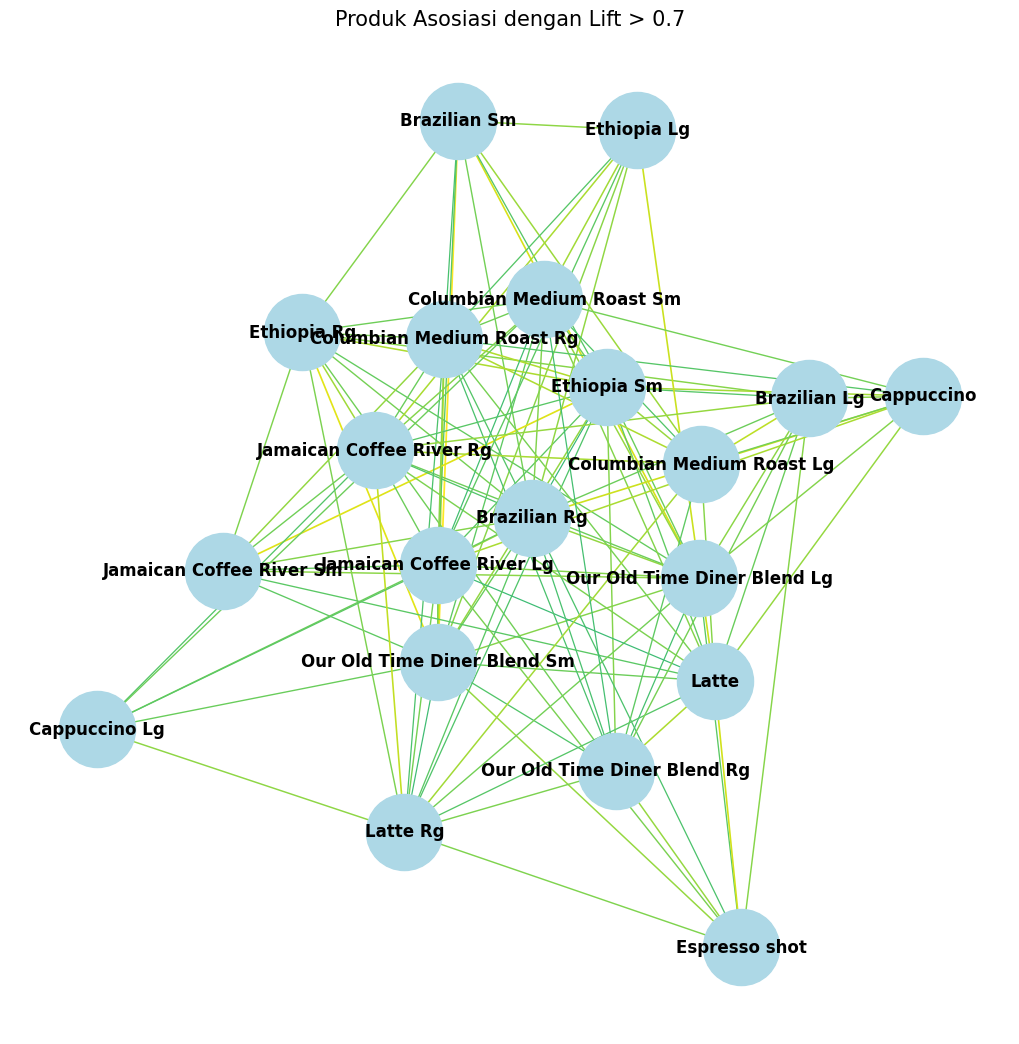

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

# Filter aturan asosiasi dengan lift > 0.7
filtered_rules = rules[rules['lift'] > 0.7]

# Buat Graph dari NetworkX untuk visualisasi asosiasi
G = nx.Graph()

# Menambahkan nodes (produk) dan edges (asosiasi antara produk)
for index, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            lift = row['lift']
            # Set the edge weight based on lift value
            G.add_edge(str(antecedent), str(consequent), weight=lift)

# Visualisasi Network Graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout posisi node

# Get the lift values to map color and thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)

# Color edges based on the lift value, use a colormap for color variation
edge_colors = plt.cm.viridis(np.array(edge_weights) / max_weight)

# Draw the graph with varying edge thickness and color
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color=edge_colors, width=edge_weights)

# Title
plt.title('Produk Asosiasi dengan Lift > 0.7', fontsize=15)
plt.show()


HASIL

In [ ]:
 # Kesimpulan rekomendasi
print("The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.")

The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
